# Exercise 1

a. Create a class `Vehicle` with attributes: name, max_speed and mileage. Important: use `__init__`!

b. Define a member function `seating_capacity` that prints the name of the Vehicle and the seat capacity that can be passed as argument to the function

c. Create a `Bus` class that inherits from the Vehicle class. Give the capacity argument of `Bus.seating_capacity()` a default value of 50.

d. Define a class attribute ”color” with a default value white, i.e. every Vehicle should be white. Define a new class `Car` that inherits from Vehicle with deafult seat capacity of 5 and check the color.

e. Finally, determine if School_bus is also an instance of the Vehicle class (hint: check the built in function `isinstance`)


In [1]:
class Vehicle:
    
    # Class attribute
    color = "White"
    
    def __init__(self, name, max_speed, mileage):
        self.name = name
        self.max_speed = max_speed
        self.mileage = mileage

    def seating_capacity(self, capacity):
        return f"The seating capacity of a {self.name} is {capacity} passengers"

class Bus(Vehicle):
    # assign default value to capacity
    def seating_capacity(self, capacity=50):
        return super().seating_capacity(capacity=capacity)

    
class Car(Vehicle):
    # assign default value to capacity
    def seating_capacity(self, capacity=5):
        return super().seating_capacity(capacity=capacity)

    

School_bus = Bus("School Volvo", 180, 12)
print(School_bus.seating_capacity())
print("The bus color is:", School_bus.color)

Audi = Car("Audi A5", 250, 100)
print(Audi.seating_capacity())
print("The car color is:", Audi.color)


# Python's built-in isinstance() function
print(isinstance(School_bus, Vehicle))

The seating capacity of a School Volvo is 50 passengers
The bus color is: White
The seating capacity of a Audi A5 is 5 passengers
The car color is: White
True


# Exercise 2

Follow the steps:

- Create a class, Triangle. Its __init__() method should take self, angle1, angle2, and angle3 as arguments. Make sure to set these appropriately in the body of the __init__() method.
- Create a variable named number_of_sides and set it equal to 3.
- Create a method named check_angles. The sum of a triangle's three angles is It should return True if the sum of self.angle1, self.angle2, and self.angle3 is equal 180, and False otherwise.
- Create a variable named my_triangle and set it equal to a new instance of your Triangle class. Pass it three angles that sum to 180 (e.g. 90, 30, 60).
- Print out my_triangle.number_of_sides and print out my_triangle.check_angles().


In [2]:
class Triangle(object):
    def __init__(self,angle1,angle2,angle3):
        self.angle1=angle1
        self.angle2=angle2
        self.angle3=angle3

    number_of_sides=3
    def check_angles(self):
        if self.angle1+self.angle2+self.angle3 ==180:
            return True
        else:
            return False

class Equilateral(Triangle):
    angle = 60
    def __init__(self):
        self.angle1 = self.angle2 = self.angle3 = self.angle
        
        
my_triangle=Triangle(90,30,60)
print(my_triangle.number_of_sides)

print(my_triangle.check_angles())

3
True


# Exercise 3

Write a Python program that overloads the operator + and > for a custom class. (To overload the operators for the class objects we define the specific dunders method. For the + operator the dunder method is \__add\__() and for > its \__gt\__(), check more about dunder methods if you are interested https://www.pythonmorsels.com/what-are-dunder-methods/).
The class must accecpt lists, the plus operation must sum lists, the greater than operator must check the length os the lists.


In [3]:
class Orders:
    def __init__(self, items):
        self.items = items

    # overload the + operator
    def __add__(self, other):
        return self.items + other.items

    # overload the > operator
    def __gt__(self, other):
        return len(self.items) > len(other.items)

order1 = Orders([1, 2, 3, 4, 5, 6])

order2 = Orders([10, 20, 30])

print("order1 + order2=", order1 + order2)
print("order1 > order2=", order1 > order2)

order1 + order2= [1, 2, 3, 4, 5, 6, 10, 20, 30]
order1 > order2= True


# Exercise 4

Create a class that takes as input a list of countries and returns their capitals. Also implement functions that fill a bar plot of population and surface occupied by each county (hint: you can create three member functions, one for each task).

To get info about countries you can use the package `countryinfo` (if not installed use pip, i.e. `pip3 install countryinfo` or look for it into anaconda repositories. Check the doc to learn how to access the required information: https://pypi.org/project/countryinfo/#api-usage).

In [6]:
from countryinfo import CountryInfo
import matplotlib.pyplot as plt
import numpy as np


class show_country_info:
    
    def __init__(self, list_of_countries):
        self.list_of_countries = list_of_countries
        self.N = len(self.list_of_countries)
        
    
    def get_capital(self):
        
        for country_name in self.list_of_countries:
            country = CountryInfo(country_name)
            print("\nThe capital of {} is {}.".format(country_name,country.capital()))
        print("\n\n")
            
    def get_population(self,ax):
        pop = np.zeros(self.N)
        for i,country_name in enumerate(self.list_of_countries):
            country = CountryInfo(country_name)
            pop[i] = country.population()
            
        ax.bar(self.list_of_countries,pop)

        
    def get_surface(self,ax):
        area = np.zeros(self.N)
        for i,country_name in enumerate(self.list_of_countries):
            country = CountryInfo(country_name)
            area[i] = country.area()
            
        ax.bar(self.list_of_countries,area)


The capital of Italy is Rome.

The capital of Madagascar is Antananarivo.

The capital of Tuvalu is Funafuti.

The capital of Russia is Moscow.





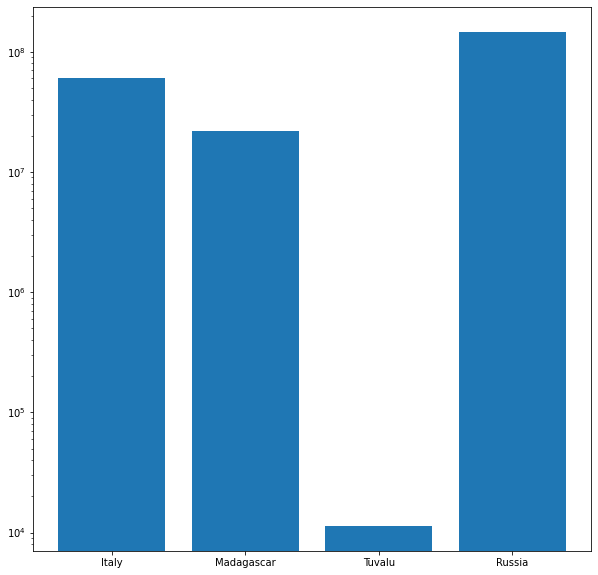

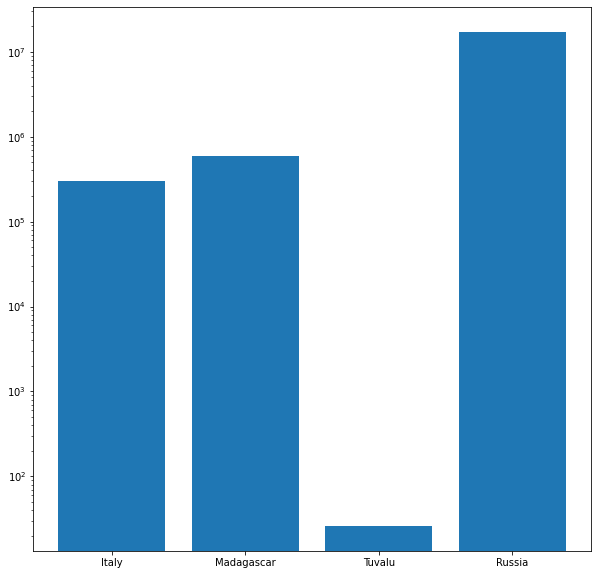

In [7]:
list_of_nations = ["Italy", "Madagascar", "Tuvalu", "Russia"]
countries = show_country_info(list_of_nations)

countries.get_capital()

fig, ax=plt.subplots(figsize=(10,10))
ax.set_yscale('log')
countries.get_population(ax)

fig, ax=plt.subplots(figsize=(10,10))
ax.set_yscale('log')
countries.get_surface(ax)

# Exercise 5

Write a Python class to find validity of a string of parentheses, '(', ')', '{', '}', '[' and ']. These brackets must be close in the correct order,
for example "()" and "()[]{}" are valid but "[)", "({[)]" and "{{{" are invalid.

In [8]:
class check_p:
    def is_valid_parenthese(self, str1):
        stack = [] # array that store parentesis
        pchar = {"(": ")", "{": "}", "[": "]"}

        for parenthese in str1:
            if parenthese in pchar:
                stack.append(parenthese)
                #print(stack)
            elif len(stack) == 0 or pchar[stack.pop()] != parenthese: # pop() removes an item from the back
                return False
        return len(stack) == 0

print(check_p().is_valid_parenthese("(){}[]"))
print(check_p().is_valid_parenthese("()[{)}"))
print(check_p().is_valid_parenthese("([])"))

True
False
True


# Exercise 6

Write a Python class to convert an integer to a roman numeral. Check https://en.wikipedia.org/wiki/Roman_numerals for a review.

In [9]:
class Roman_conventer:
    # member fuction that converts the integers
    def int_to_Roman(self, num):
        # array of values
        val = [
            1000, 900, 500, 400,
            100, 90, 50, 40,
            10, 9, 5, 4,
            1
            ]
        # array of simbols
        syb = [
            "M", "CM", "D", "CD",
            "C", "XC", "L", "XL",
            "X", "IX", "V", "IV",
            "I"
            ]
        
        # string for roman number
        roman_num = ''
        i = 0
        while  num > 0:
            for _ in range(num // val[i]): #  if the reminder of a selected value is larger than zero, than the number roman number contains the associated symbol
                roman_num += syb[i]
                num -= val[i]
            i += 1
        return roman_num


print(Roman_conventer().int_to_Roman(1))
print(Roman_conventer().int_to_Roman(4000))
print(Roman_conventer().int_to_Roman(1957))

I
MMMM
MCMLVII
